# Project 2 by Aaron Dreyfuss and Raymond Toth

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df2 = pd.read_csv('Project2Data.csv')

# The are two different columns that have the anual cost of each college.
# COSTT4_A is for academic year, COSTT4_P is for program year.
# Each school has a value for one or the other, but not both, so we must combine them into one column.
# Because we can not add nan values, we must first turn those into 0s.

df2['TOTALCOST'] = df2['COSTT4_A'].fillna(0) + df2['COSTT4_P'].fillna(0)

# Some schools have nan values for both COSTT4_A and COSTT4_P
# We must remove them as most questions are related to the annual cost.

df = df2[df2['TOTALCOST'] != 0]

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (6,9,31,1608,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1688,1689,1690,1691,1692,1703,1704,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# What is the most costly college? What is the cheapest?

In [2]:
expensive = df.sort_values('TOTALCOST')

print("The cheapest college is " + expensive['INSTNM'][expensive.index[0]] + 
     "\nThe most costly college is " + expensive['INSTNM'][expensive.index[-1]])

The cheapest college is C. Alexander School of Cosmetology
The most costly college is L3 Commercial Training Solutions Airline Academy


# What is the average cost of college in different parts of the US?

<BarContainer object of 59 artists>

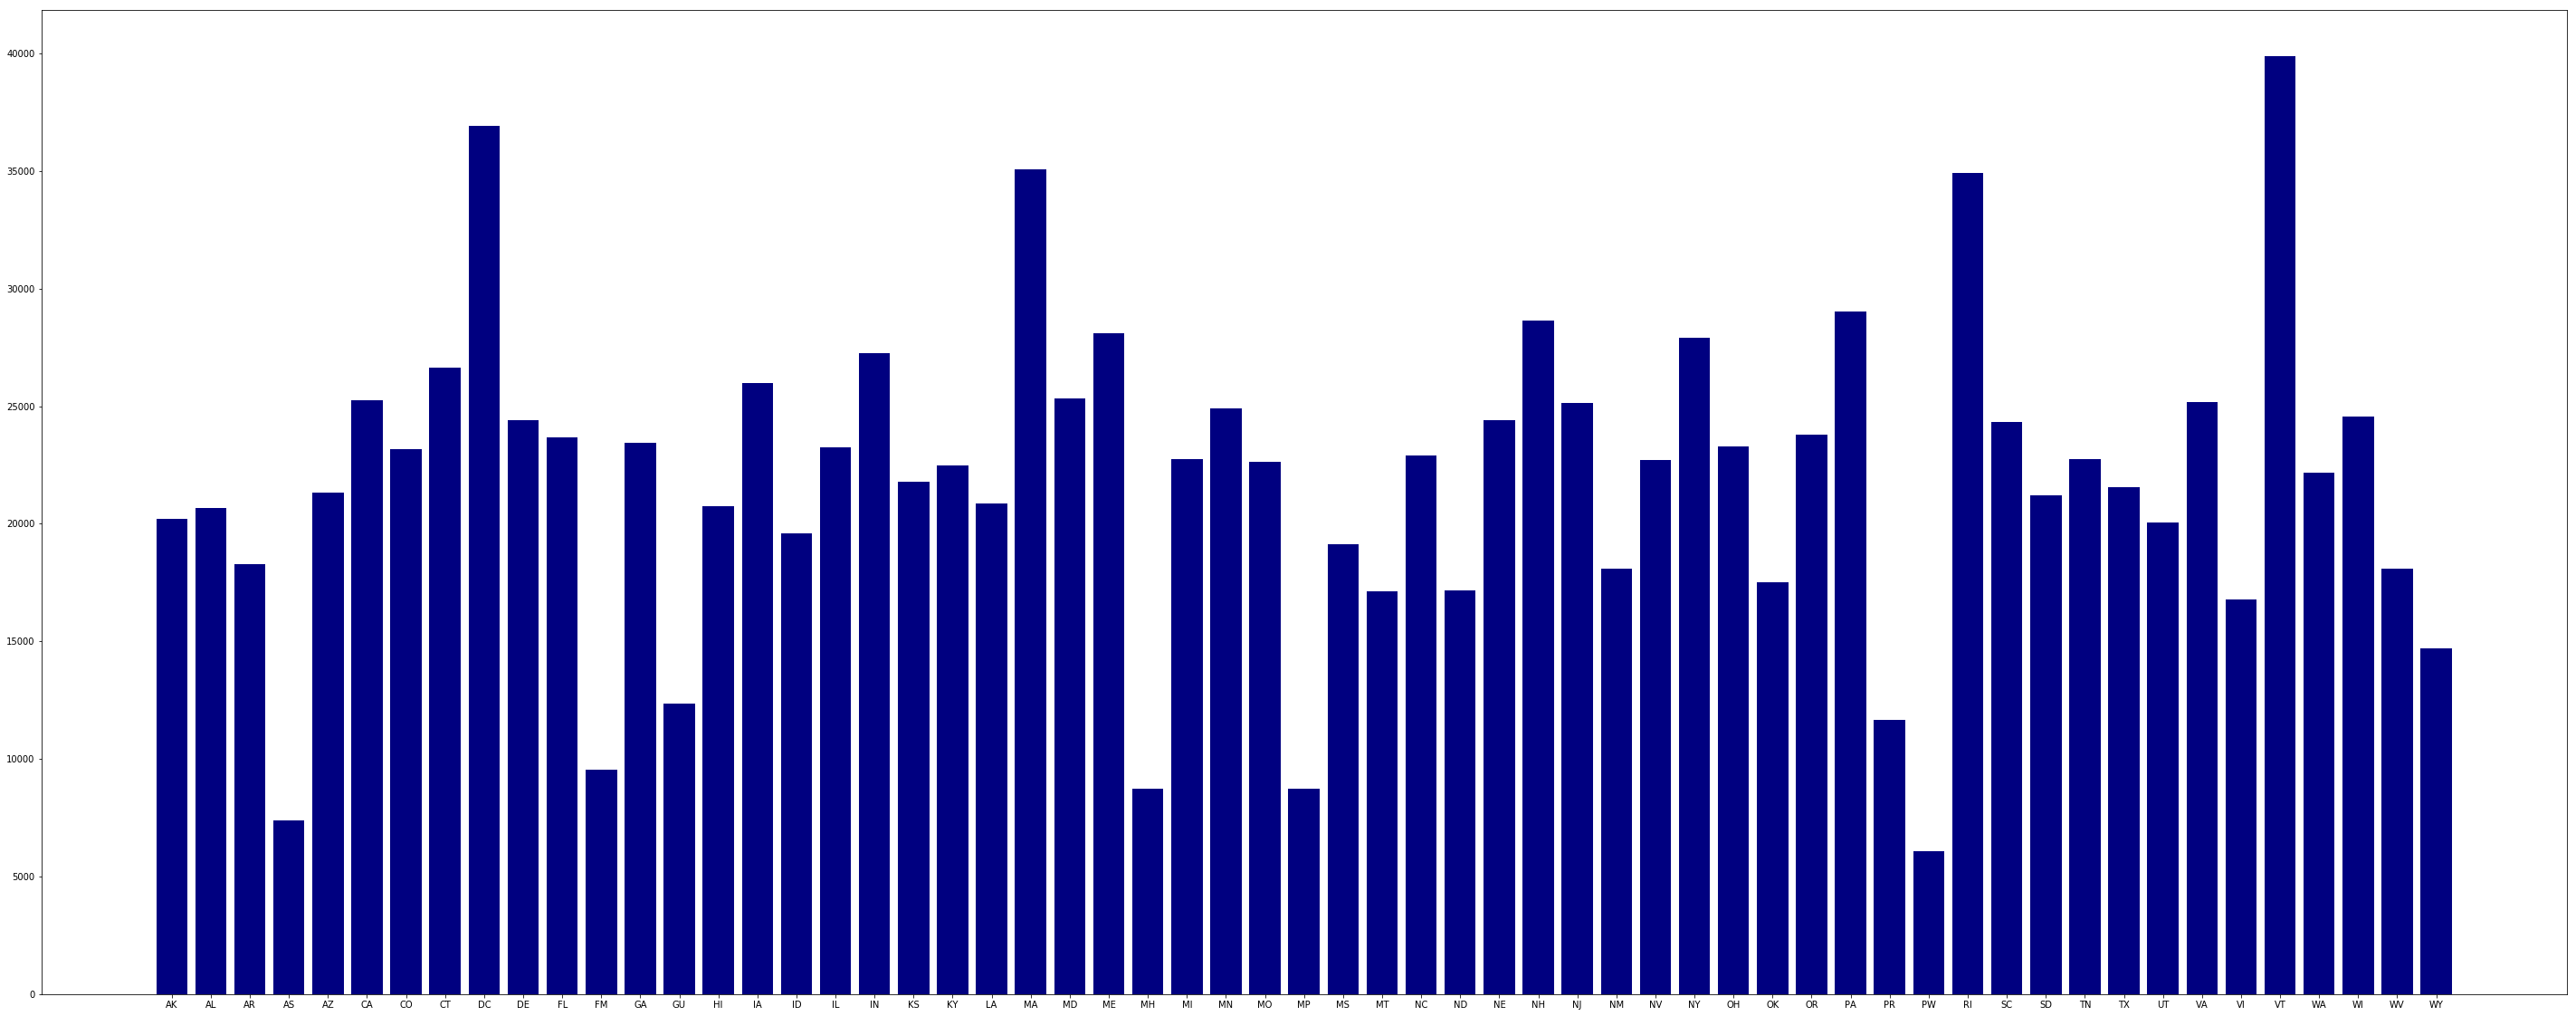

In [3]:
# The state the school is located in is represented by the column STABBR.
# The following code will find the mean of the values of every school in the same state.

state = df.groupby(['STABBR']).mean()

plt.figure(figsize=(50,20))
plt.bar(state.index,state['TOTALCOST'],color='navy')

# What is the average cost of religious vs. secular institutions?

In [4]:
# Create a dataset where the index is all of the different religions
religious = df.groupby('RELAFFIL').mean()

# Create a dataset of only the institutions with no religous affiliation
secular = df[df['RELAFFIL'].isnull()]

relavg = religious['TOTALCOST'].mean()
secavg = secular['TOTALCOST'].mean()

print("The average cost of all religious institutions is $" + str(round(relavg,2)) +
     "\nThe average cost of all secular institutions is $" + str(round(secavg,2)))

The average cost of all religious institutions is $35304.22
The average cost of all secular institutions is $21895.62


# What percent of colleges have an open admission policy?

In [5]:
# Open admission is represented by the column OPENADMP
# Colleges with an open admission policy are represented by 1.0

admpol = df2[df2['OPENADMP'].notnull()]
openad = admpol.groupby('OPENADMP').size()
openper = float(openad[1.0]) / len(df2['OPENADMP']) * 100

print(str(round(openper,1)) + "% of colleges have an open admission policy.")

57.6% of colleges have an open admission policy.


# What is the correlation (scatterplot) between admission rates and college cost?

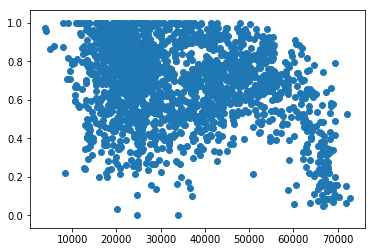

In [6]:
plt.scatter(df['TOTALCOST'], df['ADM_RATE'])

# There does not seem to be a direct correlation between admission rates and college costs.

# What is the correlation between SAT scores and admission rates? Are there any outliers?

Generally speaking, schools with the lower admission rates have a student body with a higher average SAT score
One outlier is Fort Valley State University
It has an average SAT score of 564, yet the accaptence rate is only 43.66%


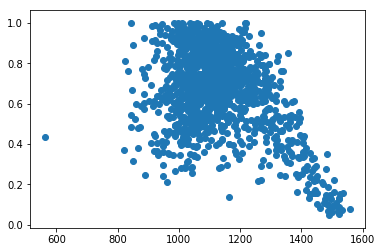

In [7]:
satav = df.sort_values('SAT_AVG')
plt.scatter(df['SAT_AVG'], df['ADM_RATE'])

# Generally speaking, schools with the lower admission rates have a student body with a higher average SAT score.
# One outlier is Fort Valley State University.
# It has an average SAT score of 564, yet the accaptence rate is only about 44%

print("Generally speaking, schools with the lower admission rates have a student body with a higher average SAT score")
print("One outlier is " + satav['INSTNM'][satav.index[0]])
print("It has an average SAT score of " + str(int(satav['SAT_AVG'][satav.index[0]])) + 
      ", yet the accaptence rate is only " + str(satav['ADM_RATE'][satav.index[0]]*100) + "%")

# What colleges have the highest and lowest family income averages? How does that correlate with college costs?

The college with the lowest average family income is J F Ingram State Technical College
The college with the highest average family income is the Jewish Theological Seminary of America
As we can see from this scatterplot, students from more affluent families tend to attend more costly schools.


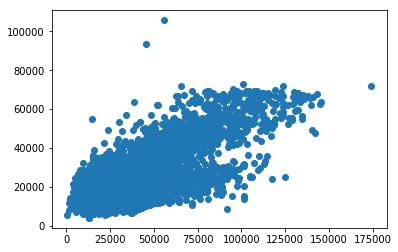

In [8]:
# Gets rid of all nan values
family = df[df['FAMINC'].notnull()]

# Gets rid of PrivacySuppressed values
family = family[family['FAMINC'] != 'PrivacySuppressed']

# The values in the column are strings. Change them to floats.
family['FAMINC'] = family['FAMINC'].astype(float)

# sorts the dataframe in order of average family income
family = family.sort_values('FAMINC')

print("The college with the lowest average family income is " + family['INSTNM'][family.index[0]] + 
     "\nThe college with the highest average family income is the " + family['INSTNM'][family.index[-1]])

plt.scatter(family['FAMINC'], family['TOTALCOST'])

print("As we can see from this scatterplot, students from more affluent families tend to attend more costly schools.")